In [ ]:
pip install intel-extension-for-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 8.8 MB/s eta 0:00:00


In [40]:
import os
import intel_extension_for_pytorch as ipex
#import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: reeshmashahira
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:30<00:00, 93.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:
import os

# Specify the directory where the dataset is downloaded
data_dir = '/content/new-plant-diseases-dataset'

print(os.listdir(data_dir))

# List classes directly within the dataset directory
classes = os.listdir(data_dir)
print(classes)




['new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'test']
['new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'test']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

# Specify the directory where the dataset is downloaded
data_dir = '/content/new-plant-diseases-dataset'

# Create the dataset
dataset = ImageFolder(data_dir, transform=ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [ ]:
print(dataset.classes)
print(len(dataset.classes))

['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
3


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  New Plant Diseases Dataset(Augmented) (0)


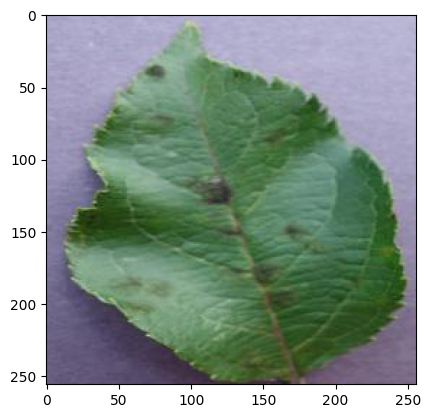

In [ ]:
show_example(*dataset[0])

Label:  New Plant Diseases Dataset(Augmented) (0)


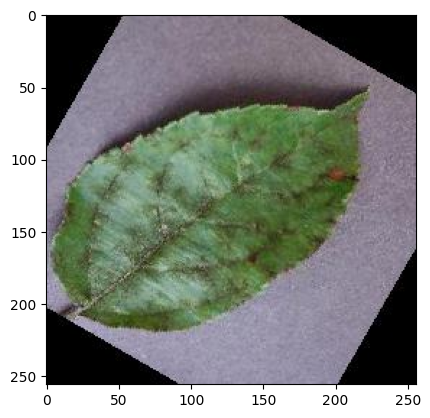

In [ ]:
show_example(*dataset[1099])

In [ ]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

In [ ]:
import os

data_dir = '/content/new-plant-diseases-dataset'
print(os.listdir(data_dir))


['new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'test']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

# Specify the directory where the dataset is downloaded
data_dir = '/content/new-plant-diseases-dataset'

# Define the transformation
transform = ToTensor()

# Create the training dataset
train_ds = ImageFolder(data_dir, transform=transform)

# Create the validation dataset
valid_ds = ImageFolder(data_dir, transform=transform)


In [ ]:
train_ds[0]

(tensor([[[0.6549, 0.6510, 0.6471,  ..., 0.7255, 0.7176, 0.7098],
          [0.6667, 0.6627, 0.6588,  ..., 0.7294, 0.7216, 0.7176],
          [0.6667, 0.6627, 0.6588,  ..., 0.7373, 0.7294, 0.7255],
          ...,
          [0.3922, 0.4000, 0.4078,  ..., 0.4941, 0.4941, 0.4941],
          [0.3961, 0.4000, 0.4039,  ..., 0.4784, 0.4824, 0.4824],
          [0.4078, 0.4039, 0.4000,  ..., 0.4745, 0.4784, 0.4824]],
 
         [[0.6392, 0.6353, 0.6314,  ..., 0.7137, 0.7059, 0.6980],
          [0.6510, 0.6471, 0.6431,  ..., 0.7176, 0.7098, 0.7059],
          [0.6510, 0.6471, 0.6431,  ..., 0.7255, 0.7176, 0.7137],
          ...,
          [0.3529, 0.3608, 0.3686,  ..., 0.4314, 0.4314, 0.4314],
          [0.3569, 0.3608, 0.3647,  ..., 0.4157, 0.4196, 0.4196],
          [0.3686, 0.3647, 0.3608,  ..., 0.4118, 0.4157, 0.4196]],
 
         [[0.7686, 0.7647, 0.7608,  ..., 0.8275, 0.8196, 0.8118],
          [0.7804, 0.7765, 0.7725,  ..., 0.8314, 0.8235, 0.8196],
          [0.7804, 0.7765, 0.7725,  ...,

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size=32

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

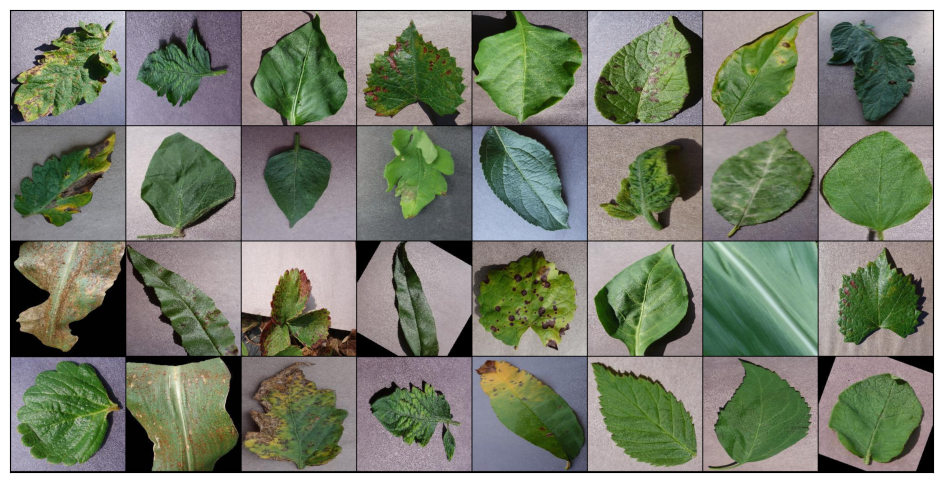

In [ ]:
show_batch(train_dl)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
from torchvision import models
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        resnet = models.resnet18(weights='ResNet18_Weights.DEFAULT')
        self.resnet_layers = nn.Sequential(*list(resnet.children())[:-1])
        self.fc1 = nn.Linear(512, 128)
        self.fc2 = nn.Linear(128, 38)

    def forward(self, xb):
        x = self.resnet_layers(xb)
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.fc2(out)
        return out

In [ ]:
model = CnnModel()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.7MB/s]


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
model.to(device)

CnnModel(
  (resnet_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
from tqdm import tqdm

def evaluate_with_progress(model, val_dl):
    model.eval()
    correct = 0
    total = 0

    # Use tqdm to create a progress bar
    with tqdm(val_dl, unit='batch') as t:
        for images, labels in t:
            # Move data to device (e.g., GPU)
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get predicted labels
            _, predicted = torch.max(outputs, 1)

            # Count correct predictions
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # Update progress bar description
            t.set_description('Validation')
            t.set_postfix(correct=correct, total=total)

    # Calculate accuracy
    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy


In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
from tqdm import tqdm

def fit_with_progress(num_epochs, lr, model, train_dl, val_dl, opt_func):
    optimizer = opt_func(model.parameters(), lr)
    history = []  # for storing training losses and accuracies

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        train_losses = []

        # Use tqdm to create a progress bar
        with tqdm(train_dl, unit='batch') as t:
            for xb, yb in t:
                xb, yb = xb.to(device), yb.to(device)
                # Generate predictions
                pred = model(xb)
                # Calculate loss
                loss = F.cross_entropy(pred, yb)
                # Append to train_losses
                train_losses.append(loss)
                # Compute gradients
                loss.backward()
                # Update parameters
                optimizer.step()
                optimizer.zero_grad()

                # Update progress bar description
                t.set_description(f'Epoch {epoch}/{num_epochs}')
                t.set_postfix(loss=loss.item())

        # Compute average training loss for this epoch
        train_loss = torch.stack(train_losses).mean().item()

        # Validation Phase
        model.eval()
        val_losses = []
        correct = 0
        total = 0

        with torch.no_grad():
            for xb, yb in val_dl:
                xb, yb = xb.to(device), yb.to(device)
                # Generate predictions
                pred = model(xb)
                # Calculate loss
                loss = F.cross_entropy(pred, yb)
                # Append to val_losses
                val_losses.append(loss)
                # Count correct predictions
                _, predicted = torch.max(pred.data, 1)
                total += yb.size(0)
                correct += (predicted == yb).sum().item()

        # Compute average validation loss and accuracy for this epoch
        val_loss = torch.stack(val_losses).mean().item()
        val_acc = correct / total

        # Store training history
        history.append({'epoch': epoch, 'train_loss': train_loss, 'val_loss': val_loss, 'val_acc': val_acc})

        # Print progress
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return history


In [ ]:


# Save the trained model
torch.save(model.state_dict(), 'model.pth')


In [ ]:
import torch
from PIL import Image
from torchvision.transforms import ToTensor, Normalize, Compose
from google.colab import files  # Import the files module

# Define the preprocessing transformations
preprocess = Compose([
    ToTensor(),  # Convert image to tensor
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Load the trained model
model = CnnModel()  # Replace `CnnModel()` with your actual model definition
model.load_state_dict(torch.load('model.pth'))  # Load the model's state dict
model.eval()  # Set model to evaluation mode

# Upload image file
uploaded = files.upload()

# Process uploaded image
for filename in uploaded.keys():
    image = Image.open(filename).convert('RGB')  # Ensure image is in RGB format
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_class = predicted.item()

    # Print predicted class
    print('Predicted class index:', predicted_class)


Saving Screenshot 2024-04-05 214534.png to Screenshot 2024-04-05 214534.png
Predicted class index: 22


In [ ]:
# Load the saved model
model = CnnModel()  # Instantiate the model
model.load_state_dict(torch.load('model.pth'))  # Load the model's state dict
model.eval()  # Set model to evaluation mode

CnnModel(
  (resnet_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat